# Extreme Value Analysis

I am going to use pyextremes Python module in this notebook. pyextremes provides tools necessary to perform a wide range of tasks required to perform univariate EVA, such as:

* extraction of extreme events from time series using methods such as Block Maxima (BM) or Peaks Over Threshold (POT)
* fitting continuous distributions, such as GEVD, GPD, or user-specified continous distributions to the extracted extreme events
* visualization of model inputs, results, and goodness-of-fit statistics
* estimation of extreme events of given probability or return period (e.g. 100-year event) and of corresponding confidence intervals
* tools assisting with model selection and tuning, such as selection of block size in BM and threshold in POT


https://georgebv.github.io/pyextremes/

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
series = pd.read_csv(
    "data/battery_wl.csv",
    index_col=0,
    parse_dates=True,
).squeeze()

In [3]:
series.head()

Date-Time (GMT)
1920-06-01 05:00:00   -0.659
1920-06-01 06:00:00   -0.873
1920-06-01 07:00:00   -1.025
1920-06-01 08:00:00   -0.964
1920-06-01 09:00:00   -0.659
Name: Water Elevation [m NAVD88], dtype: float64

In [4]:
series.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 809903 entries, 1920-06-01 05:00:00 to 2020-03-31 23:00:00
Series name: Water Elevation [m NAVD88]
Non-Null Count   Dtype  
--------------   -----  
809903 non-null  float64
dtypes: float64(1)
memory usage: 12.4 MB


<Axes: xlabel='Date-Time (GMT)'>

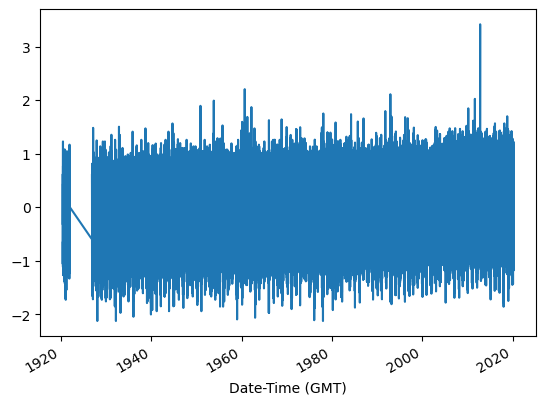

In [5]:
series.plot()

In [6]:
# Cleaning up data and a hint: Let's remove entries before the large gap before 1925 
# and detrend the data by removing a linear trend (mean sea level rise, 2.87mm/yr for this area) around the current tidal epoch (1992). 
# This linear trend represents sea level rise, which is deterministic and is not related to random variations in water elevations.

series = (
    series
    .sort_index(ascending=True)
    .astype(float)
    .dropna()
    .loc[pd.to_datetime("1925"):]
)
series = series - (series.index.array - pd.to_datetime("1992")) / pd.to_timedelta("365.2425D") * 2.87e-3

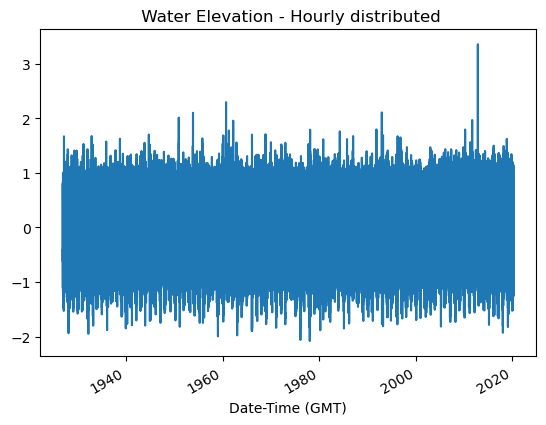

In [7]:
plt.title(" Water Elevation - Hourly distributed")
series.plot()
plt.show()

In [8]:
series.head(25)

Date-Time (GMT)
1926-11-20 05:00:00   -0.411120
1926-11-20 06:00:00   -0.777120
1926-11-20 07:00:00   -1.051120
1926-11-20 08:00:00   -1.051121
1926-11-20 09:00:00   -0.808121
1926-11-20 10:00:00   -0.411121
1926-11-20 11:00:00    0.106878
1926-11-20 12:00:00    0.563878
1926-11-20 13:00:00    0.807878
1926-11-20 14:00:00    0.776877
1926-11-20 15:00:00    0.533877
1926-11-20 16:00:00    0.167877
1926-11-20 17:00:00   -0.228124
1926-11-20 18:00:00   -0.625124
1926-11-20 19:00:00   -0.960124
1926-11-20 20:00:00   -1.082125
1926-11-20 21:00:00   -0.990125
1926-11-20 22:00:00   -0.716125
1926-11-20 23:00:00   -0.350126
1926-11-21 00:00:00    0.014874
1926-11-21 01:00:00    0.289874
1926-11-21 02:00:00    0.411873
1926-11-21 03:00:00    0.289873
1926-11-21 04:00:00   -0.046127
1926-11-21 05:00:00   -0.350128
Name: Water Elevation [m NAVD88], dtype: float64

# Import EVA

In [9]:
from pyextremes import EVA

In [10]:
model = EVA(data=series)
model

                           Univariate Extreme Value Analysis                            
                                      Source Data                                       
----------------------------------------------------------------------------------------
Data label:    Water Elevation [m NAVD88]      Size:                             796,751
Start:                      November 1926      End:                           March 2020
                                     Extreme Values                                     
----------------------------------------------------------------------------------------
Extreme values have not been extracted
                                         Model                                          
----------------------------------------------------------------------------------------
Model has not been fit to the extremes

## Block Maxima

The Block Maxima extreme values are extracted by selecting a block size (typically 1 year, also the default in pyextremes), then partitioning time series of your signal into equal consequtive blocks of this size, and for each block getting single maximum value (thus, block maxima). The resulting BM time series are then used to model extreme value behavior using the GEVD model family.

In [11]:
model.get_extremes(
    method="BM",
    extremes_type="high",
    block_size="365.2425D",
    errors="raise",
)
model

                           Univariate Extreme Value Analysis                            
                                      Source Data                                       
----------------------------------------------------------------------------------------
Data label:    Water Elevation [m NAVD88]      Size:                             796,751
Start:                      November 1926      End:                           March 2020
                                     Extreme Values                                     
----------------------------------------------------------------------------------------
Count:                                 94      Extraction method:                     BM
Type:                                high      Block size:             365 days 05:49:12
                                         Model                                          
----------------------------------------------------------------------------------------
Model has not been fi

(<Figure size 768x480 with 1 Axes>,
 <Axes: xlabel='Date-Time (GMT)', ylabel='Water Elevation [m NAVD88]'>)

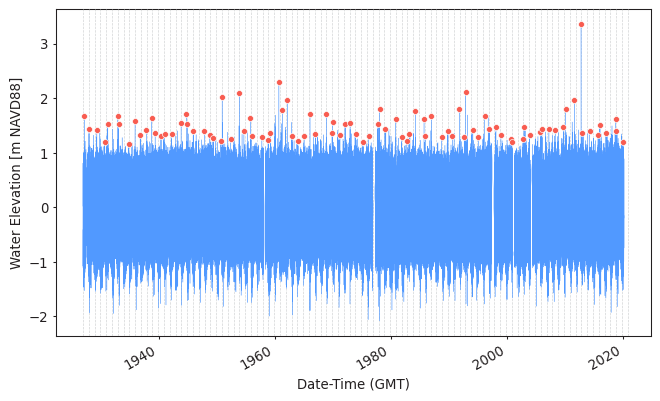

In [12]:
model.plot_extremes()

In [13]:
model.fit_model()
model

                           Univariate Extreme Value Analysis                            
                                      Source Data                                       
----------------------------------------------------------------------------------------
Data label:    Water Elevation [m NAVD88]      Size:                             796,751
Start:                      November 1926      End:                           March 2020
                                     Extreme Values                                     
----------------------------------------------------------------------------------------
Count:                                 94      Extraction method:                     BM
Type:                                high      Block size:             365 days 05:49:12
                                         Model                                          
----------------------------------------------------------------------------------------
Model:               

(<Figure size 768x768 with 4 Axes>,
 (<Axes: title={'center': 'Return value plot'}, xlabel='Return period', ylabel='Water Elevation [m NAVD88]'>,
  <Axes: title={'center': 'Probability density plot'}, xlabel='Water Elevation [m NAVD88]', ylabel='Probability density'>,
  <Axes: title={'center': 'Q-Q plot'}, xlabel='Theoretical', ylabel='Observed'>,
  <Axes: title={'center': 'P-P plot'}, xlabel='Theoretical', ylabel='Observed'>))

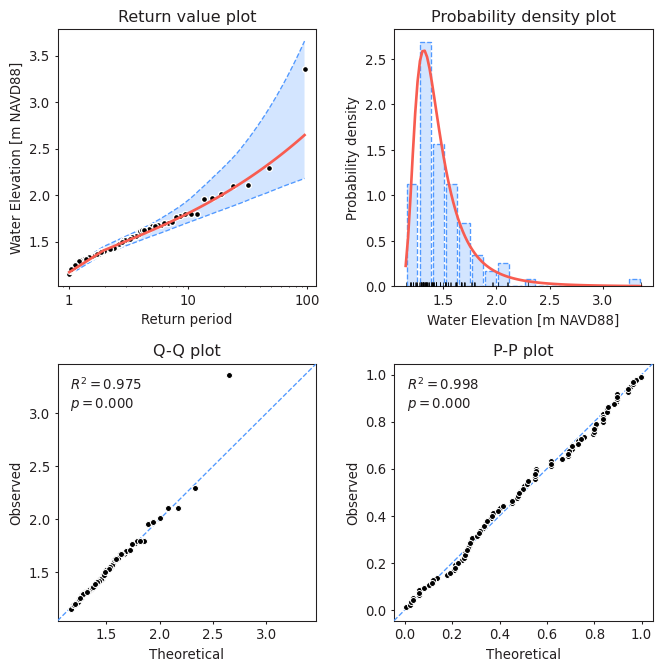

In [14]:
model.plot_diagnostic(alpha=0.95)

### 1. Return Value Plot

- **X-axis (Return Period)**: Measured in units like years; for example, a return period of 10 represents a "1-in-10-year event."
- **Y-axis (Water Elevation)**: The magnitude of the extreme event, such as flood water height.
- **Red Line & Shading**: The red line represents the extreme value model's estimate of how water elevation changes with increasing return periods. The shaded area around the line is the confidence interval.
- **Dots**: Black dots show empirical data points or derived return levels from the sample.

**Interpretation**: This plot addresses questions like, “What water height might we expect for a 10-year flood compared to a 50- or 100-year flood?” The curve indicates that as the return period increases, extreme events become rarer but more severe.

---

### 2. Probability Density Plot

- **Histogram (Blue Bars)**: Displays the observed distribution of water elevations in the data (empirical frequency).
- **Red Curve**: Represents the fitted extreme value distribution's probability density function (PDF).
- **X-axis**: Water Elevation.
- **Y-axis**: Probability Density, which shows how likely each elevation range is.

**Interpretation**: This plot compares the model's predicted distribution (red curve) with the actual data (histogram). A close alignment suggests the model captures both the overall distribution and the tail behavior well.

---

### 3. Q–Q (Quantile–Quantile) Plot

- **X-axis (Theoretical Quantiles)**: Quantiles from the fitted distribution.
- **Y-axis (Observed Quantiles)**: Quantiles from the sample data.
- **Blue Dashed Line**: Represents a perfect 1:1 match; data points lying on this line indicate a perfect model fit.
- **R² and p-value**: Quantify how closely the points align with the diagonal line.

**Interpretation**: If the data fit the model well, points cluster around the diagonal. Deviations, particularly in the upper-right, may indicate under- or overestimation of extremes. Here, the high R² (~0.975) suggests a strong fit overall, despite some deviation for the most extreme values.

---

### 4. P–P (Probability–Probability) Plot

- **X-axis (Theoretical Probabilities)**: Cumulative probabilities from the fitted distribution.
- **Y-axis (Observed Probabilities)**: Empirical cumulative probabilities from the sample.
- **Blue Dashed Line**: Represents a perfect match where y = x.
- **R² and p-value**: Diagnostic measures similar to those in the Q–Q plot.

**Interpretation**: Points close to the diagonal indicate the model's cumulative distribution function (CDF) aligns well with the data's empirical CDF. An R² of ~0.998 suggests excellent alignment, indicating the model accurately represents the cumulative behavior, including moderate extremes.


(<Figure size 768x480 with 1 Axes>,
 <Axes: xlabel='Return period', ylabel='Water Elevation [m NAVD88]'>)

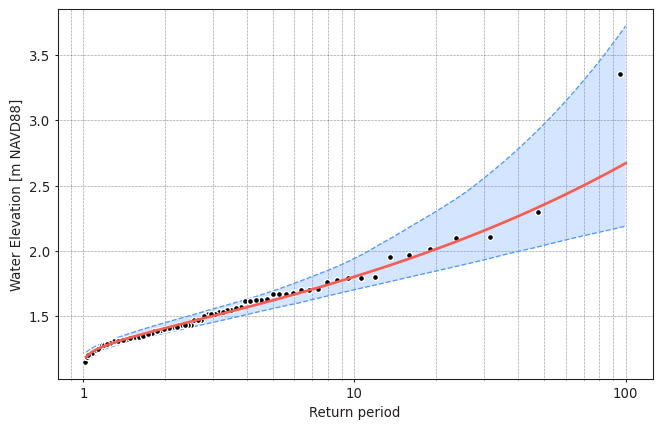

In [15]:
model.plot_return_values(
    return_period=np.logspace(0.01, 2, 100),
    return_period_size="365.2425D",
    alpha=0.95,
)

In [16]:
summary = model.get_summary(
    return_period=[1, 2, 5, 10, 25, 50, 100, 250, 500, 1000],
    alpha=0.95,
    n_samples=1000,
)
summary

,return value,lower ci,upper ci
return period,,,
1.0,0.802610,-0.655077,1.036809
2.0,1.409343,1.370499,1.453098
5.0,1.622565,1.542885,1.702629
10.0,1.803499,1.680906,1.940056
25.0,2.090267,1.856500,2.393549
50.0,2.354889,1.997569,2.874417
100.0,2.671313,2.145036,3.509098
250.0,3.188356,2.347822,4.688335
500.0,3.671580,2.501058,5.928404


## Peaks Over Threshold (POT)

Peaks Over Threshold (POT) extreme values are extracted from time series by first generating a time series of exceedances by selecting values above (or below for extremes_type="low") a certain threshold and then declustering the exceedance time series by identifying clusters separated by a given time period and then selecting only the highest (lowest) values within each cluster. Declustering is performed in order to ensure that these values are IID (independent and identically distributed) which is required for the corresponding limit distribution to be applicable. The POT extreme values asymptotically follow the Generalized Pareto Distribution famliy, according to the Pickands–Balkema–De Haan theorem.

In [17]:
model = EVA(data=series[-365:])
model.get_extremes("POT", threshold=0.5, r="12h")

(<Figure size 768x480 with 1 Axes>,
 <Axes: xlabel='Date-Time (GMT)', ylabel='Water Elevation [m NAVD88]'>)

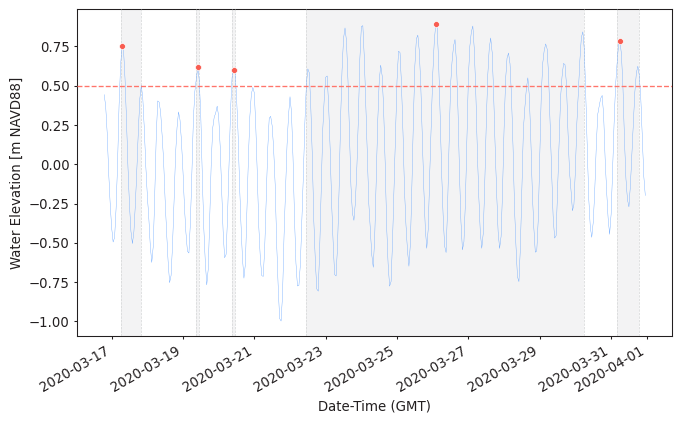

In [18]:
model.plot_extremes(show_clusters=True)

In [19]:
model = EVA(data=series)
model.get_extremes("POT", threshold=0.5, r="12h")

In [20]:
model.fit_model()
model

                           Univariate Extreme Value Analysis                            
                                      Source Data                                       
----------------------------------------------------------------------------------------
Data label:    Water Elevation [m NAVD88]      Size:                             796,751
Start:                      November 1926      End:                           March 2020
                                     Extreme Values                                     
----------------------------------------------------------------------------------------
Count:                             11,000      Extraction method:                    POT
Type:                                high      Threshold:                            0.5
                                         Model                                          
----------------------------------------------------------------------------------------
Model:               

(<Figure size 768x768 with 4 Axes>,
 (<Axes: title={'center': 'Return value plot'}, xlabel='Return period', ylabel='Water Elevation [m NAVD88]'>,
  <Axes: title={'center': 'Probability density plot'}, xlabel='Water Elevation [m NAVD88]', ylabel='Probability density'>,
  <Axes: title={'center': 'Q-Q plot'}, xlabel='Theoretical', ylabel='Observed'>,
  <Axes: title={'center': 'P-P plot'}, xlabel='Theoretical', ylabel='Observed'>))

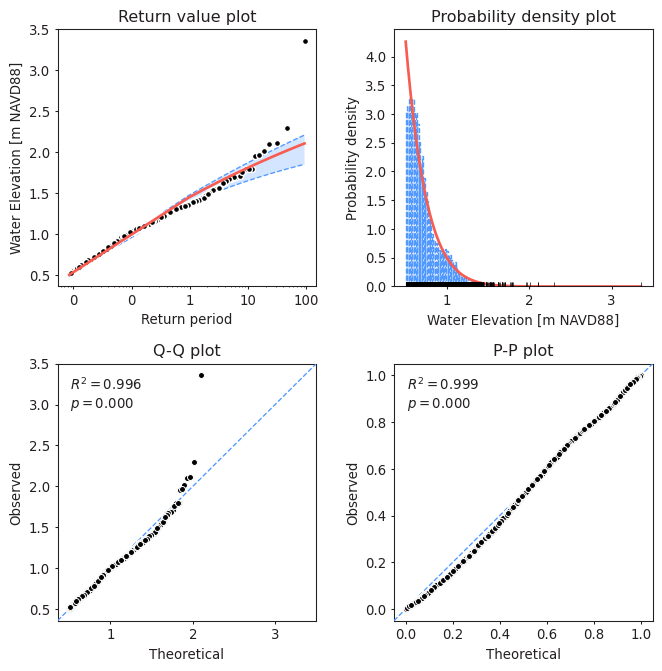

In [21]:
model.plot_diagnostic(alpha=0.95)